In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


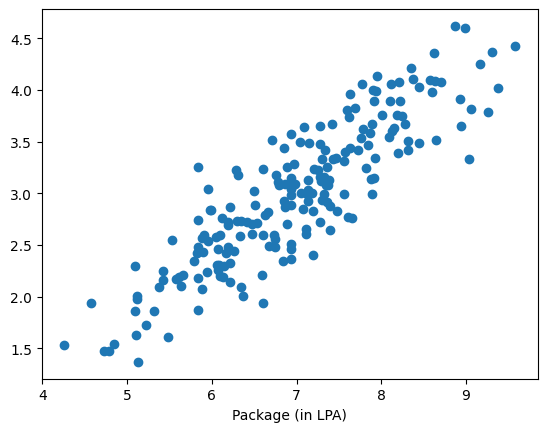

In [3]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.xlabel('CGPA')
plt.xlabel('Package (in LPA)');


In [4]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [5]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [6]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train,Y_train)

LinearRegression()

In [9]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [10]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [11]:
Linear_Regression.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0.5, 0, 'Package (in LPA)')

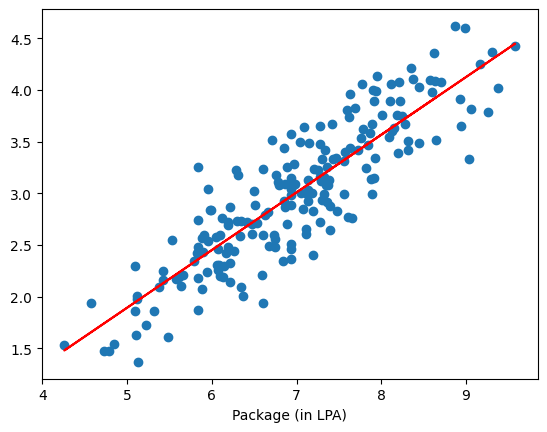

In [12]:
plt.scatter(x = df['cgpa'], y = df['package'])
plt.plot(X_train,Linear_Regression.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.xlabel('Package (in LPA)')


In [13]:
m = Linear_Regression.coef_ #slope 
m

array([0.55795197])

In [14]:
b = Linear_Regression.intercept_  #y_intercept
b

-0.8961119222429144

In [15]:
# Y = mX +b

m * 9.5 + b

array([4.40443183])

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
y_pred = Linear_Regression.predict(X_test)

In [18]:
print("MAE",mean_absolute_error(Y_test,y_pred))

MAE 0.2884710931878175


In [19]:
print("MSE",mean_squared_error(Y_test,y_pred))


MSE 0.12129235313495527


In [20]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))


RMSE 0.34827051717731616


In [21]:
print("R2 score",r2_score(Y_test,y_pred))
R2 = r2_score(Y_test,y_pred)

R2 score 0.780730147510384


In [22]:
#Adjusted R2 score
AdjR2 = 1 -(((1-R2) * (40 - 1))/(40-1-1))
print("Adjusted R2 score",AdjR2)

Adjusted R2 score 0.7749598882343415


In [23]:
new_df1 = df.copy()
new_df1['temp'] = np.random.random(200)

new_df1 = new_df1[['cgpa','temp','package']]
new_df1.head()

,cgpa,temp,package
0,6.89,0.576483,3.26
1,5.12,0.917739,1.98
2,7.82,0.276346,3.25
3,7.42,0.369345,3.67
4,6.94,0.783775,3.57


In [24]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

In [26]:
LR = LinearRegression()

In [27]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [28]:
y_prediction = LR.predict(xtest)
y_prediction

array([3.61148585, 3.51758405, 3.03491087, 2.96635529, 2.14677179,
       3.19115405, 2.42006898, 2.16346683, 2.05441614, 2.62140888,
       3.46532797, 3.50577466, 2.10957988, 3.14854527, 3.47572734,
       4.08374796, 3.11904237, 3.05793712, 3.0897457 , 3.40956441,
       2.43840982, 3.14795403, 3.86699178, 3.94716841, 3.06121216,
       3.71657054, 3.16506712, 2.75054411, 3.44410723, 3.1271024 ,
       4.47151358, 3.67372632, 2.85648034, 3.50950865, 2.68352577,
       2.82202114, 2.63602791, 2.24149805, 3.76419278, 2.6028803 ,
       1.89367771, 2.96035659, 2.44926686, 3.13361377, 2.67511674,
       2.4527823 , 2.93929381, 3.34862689, 3.03603108, 3.69795288])

In [29]:
print("R2 score",r2_score(ytest,y_prediction))
R2temp = r2_score(ytest,y_prediction)

R2 score 0.7899984488588052


In [30]:
#Adjusted R2 score
AdjR2temp = 1 -(((1-R2temp) * (40 - 1))/(40-1-2))
print("Adjusted R2 score",AdjR2temp)

Adjusted R2 score 0.7786470136619839
